# Space and Time

## Burgers' Equation

$$ \begin{equation}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial ^2u}{\partial x^2}
\end{equation} $$

Using forward difference for time, backward difference for space, and 2nd-order method for the second derivative:
$$ \begin{equation}
\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n - u_{i-1}^n}{\Delta x} = \nu \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}
\end{equation} $$

$$ \begin{equation}
u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)
\end{equation} $$

Initial Condition: 

$$ \begin{eqnarray}
u &=& -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi(t=0) = \phi_0 &=& \exp \bigg(\frac{-x^2}{4 \nu} \bigg) + \exp \bigg(\frac{-(x-2 \pi)^2}{4 \nu} \bigg)
\end{eqnarray} $$

With the analytical solution: 
$$ \begin{eqnarray}
u &=& -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi &=& \exp \bigg(\frac{-(x-4t)^2}{4 \nu (t+1)} \bigg) + \exp \bigg(\frac{-(x-4t -2 \pi)^2}{4 \nu(t+1)} \bigg)
\end{eqnarray} $$

Periodic Boundary Condition:
$$ \begin{equation}
u(0) = u(2\pi)
\end{equation} $$

## SymPy

SymPy is the symbolic math library for Python

In [1]:
# Libraries
import numpy as np
import sympy as sp
from matplotlib import pyplot as py
% matplotlib inline

# Font family and sie to use for Matplotlib figures
py.rcParams['font.family'] = 'serif'
py.rcParams['font.size'] = 16

In [2]:
# Rendering output using Latex
sp.init_printing()

In [3]:
# set up x as a symbolic variable
x = sp.symbols('x')

In [4]:
x

In [5]:
5 * x

In [6]:
x, nu, t = sp.symbols('x nu t')
phi = (sp.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) +
        sp.exp(-(x - 4 * t - 2 * np.pi)**2 / (4 * nu * (t + 1))))
phi

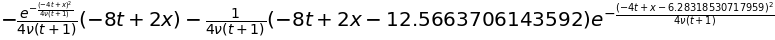

In [7]:
# derivative with respect to x
phiprime = phi.diff(x)
phiprime

In [8]:
# non-redndered derivative version using print command
print(phiprime)

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))


## Lambdify

Lambdify function takes a SymPy symbolic equation and turns it into a callable function

In [9]:
from sympy.utilities.lambdify import lambdify as ld

u = -2 * nu * (phiprime / phi) + 4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


In [10]:
u_lamb = ld((t, x, nu), u)
print('The value of u at t = 1, x = 4, nu = 3 is {}'.format(u_lamb(1, 4, 4)))

The value of u at t = 1, x = 4, nu = 3 is 3.2914627881411853


### Back to Burgers' Equation

In [11]:
# Parameters
nx = 101   # number of spatial grid points
L = 2.0 * np.pi   # length of the domain
dx = L / (nx - 1)   # spatial grid size
nu = 0.07   # viscosity
nt = 100   # number of time - steps to compute
sigma = 0.1   # CFL limit
dt = sigma * dx**2 / nu   # time - step size

# Discretize the domain
x = np.linspace(0.0, L, num = nx)

In [12]:
# Initial Conditions
t = 0.0
u0 = np.array([u_lamb(t, xi, nu) for xi in x])
u0

array([4.        , 4.06283185, 4.12566371, 4.18849556, 4.25132741,
       4.31415927, 4.37699112, 4.43982297, 4.50265482, 4.56548668,
       4.62831853, 4.69115038, 4.75398224, 4.81681409, 4.87964594,
       4.9424778 , 5.00530965, 5.0681415 , 5.13097336, 5.19380521,
       5.25663706, 5.31946891, 5.38230077, 5.44513262, 5.50796447,
       5.57079633, 5.63362818, 5.69646003, 5.75929189, 5.82212374,
       5.88495559, 5.94778745, 6.0106193 , 6.07345115, 6.136283  ,
       6.19911486, 6.26194671, 6.32477856, 6.38761042, 6.45044227,
       6.51327412, 6.57610598, 6.63893783, 6.70176967, 6.76460125,
       6.82742866, 6.89018589, 6.95176632, 6.99367964, 6.72527549,
       4.        , 1.27472451, 1.00632036, 1.04823368, 1.10981411,
       1.17257134, 1.23539875, 1.29823033, 1.36106217, 1.42389402,
       1.48672588, 1.54955773, 1.61238958, 1.67522144, 1.73805329,
       1.80088514, 1.863717  , 1.92654885, 1.9893807 , 2.05221255,
       2.11504441, 2.17787626, 2.24070811, 2.30353997, 2.36637

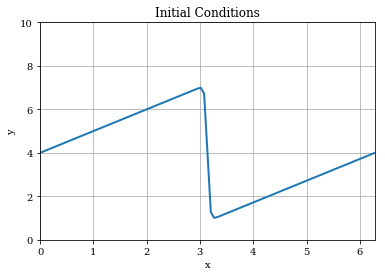

In [13]:
# Plot of the initial conditions
py.figure(figsize = (6.0, 4.0))
py.title('Initial Conditions')
py.xlabel('x')
py.ylabel('y')
py.grid()
py.plot(x, u0, color = 'C0', linestyle = '-', linewidth = 2)
py.xlim(0.0, L)
py.ylim(0.0, 10.0);

## Periodic Boundary Conditions

With periodic boundary conditions, when a point gets to the right - hand size of the frame, it wraps around back to the front of the frame.

Remember the unknown: 
$$ \begin{equation}
u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)
\end{equation} $$

In [14]:
# Integrattion of Burger's eqution in time
u = u0.copy()
for n in range(nt):
    un = u.copy()
    
    # Update all interior points
    u[1:-1] = (un[1:-1] -
                un[1:-1] * dt/dx * (un[1:-1] - un[:-2]) +
                nu * dt/dx**2 * (un[2:] - 2 * un[1:-1] +
                un[:-2]))
    
    # Update boundary points
    u[0] = (un[0] -
                un[0] * dt/dx * (un[0] - un[-1]) +
                nu * dt/dx**2 * (un[1] - 2 * un[0] + un[-1]))
    u[-1] = (un[-1] -
                un[-1] * dt/dx * (un[-1] - un[-2]) +
                nu * dt/dx**2 * (un[0] - 2 * un[-1] + un[-2]))

In [15]:
# Analytical Solution
u_analyt = np.array([u_lamb(nt * dt, xi, nu) for xi in x])

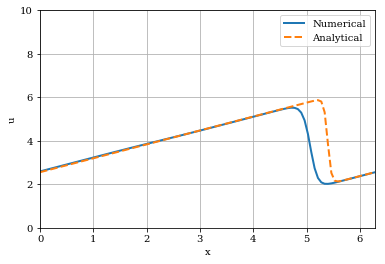

In [16]:
# Plot of the numerical solution along with the analytical solution.
py.figure(figsize = (6.0, 4.0))
py.xlabel('x')
py.ylabel('u')
py.grid()
py.plot(x, u, label = 'Numerical', color = 'C0',
                linestyle = '-', linewidth = 2)
py.plot(x, u_analyt, label = 'Analytical', color = 'C1',
                linestyle = '--', linewidth = 2)
py.legend()
py.xlim(0.0, L)
py.ylim(0.0, 10.0);

In [17]:
from matplotlib import animation
from IPython.display import HTML

In [18]:
'''
    Computes the numerical solution of the 1D Burgers'
    equation over the time steps.
    u0 : numpy.ndarray, initial conditions as a 1D array of floats
    dx : float, grid spacing
    dt : float, time - step size
    nu : float, viscosity
    nt : integer, number of time steps to compute, default: 20
'''

def burgers(u0, dx, dt, nu, nt = 20):
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        un = u.copy()
        
        # Update all interior points
        u[1:-1] = (un[1:-1] - 
                       un[1:-1] * dt/dx * (un[1:-1] - un[:-2]) +
                       nu * dt/dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2]))
        
        # Update boundary points
        u[0] = (un[0] - un[0] * dt/dx * (un[0] - un[-1]) +
                    nu * dt/dx**2 * (un[1] - 2 * un[0] + un[-1]))
        u[-1] = (un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) + 
                    nu * dt/dx**2 * (un[0] - 2 * un[-1] + un[-2]))
        
        u_hist.append(u.copy())
    return u_hist

In [19]:
# Computes the history of the numerical solution
u_hist = burgers(u0, dx, dt, nu, nt = nt)

# Computes the history of the analytical solution
u_analyt = [np.array([u_lamb(n*dt, xi, nu) for xi in x])
                        for n in range(nt)]

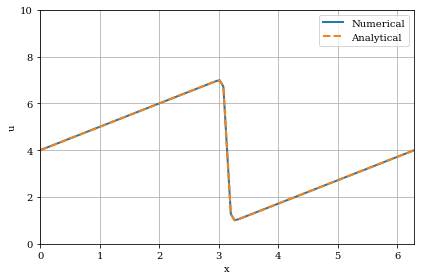

In [20]:
fig = py.figure(figsize = (6.0, 4.0))
py.xlabel('x')
py.ylabel('u')
py.grid()
u0_analyt = np.array([u_lamb(0.0, xi, nu) for xi in x])
line1 = py.plot(x, u0, label = 'Numerical', color = 'C0',
                   linestyle = '-', linewidth = 2)[0]
line2 = py.plot(x, u0_analyt, label = 'Analytical', color = 'C1',
                   linestyle = '--', linewidth = 2)[0]
py.legend()
py.xlim(0.0, L)
py.ylim(0.0, 10.0)
fig.tight_layout()

In [21]:
'''
    Update the lines y-data of the Matplotlib figure
    n : integer, time-step index
    u_hist : list of numpy.ndarray objects, history of
                numerical solution
    u_analyt : list of numpy.ndarray objets, history of
                analytical solution
'''

def update_plot(n, u_hist, u_analyt):
    fig.suptitle('Time Step {:0>2}'.format(n))
    line1.set_ydata(u_hist[n])
    line2.set_ydata(u_analyt[n])

In [22]:
# Create an animation
anime = animation.FuncAnimation(fig, update_plot,
                        frames = nt, fargs = (u_hist, u_analyt),
                        interval = 100)

# Display the video
HTML(anime.to_html5_video())

## Array Operation Speed Increase

`%%time` is called a "cell magic." It runs the cell several times and returns the average execution for the contained code.

In [23]:
%%timeit

# Initial Conditions
u = np.array([u_lamb(t, x0, nu) for x0 in x])

# Integration in time using a nested for loop
for n in range(nt):
    un = u.copy()
    
    # Update all interior and left boundary points
    for i in range(nx - 1):
        u[i] = (un[i] - 
                    un[i] * dt/dx *(un[i] - un[i - 1]) +
                    nu * dt/dx**2 * (un[i + 1] - 2 * un[i] + un[i - 1]))
        
    # Update right boundary points
    u[-1] = (un[-1] - 
                 un[-1] * dt/dx * (un[-1] - un[-2]) + 
                 nu * dt/dx**2 * (un[0]- 2 * un[-1] + un[-2]))

19.2 ms ± 910 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
%%timeit

# Initial Conditions
u = np.array([u_lamb(t, xi, nu) for xi in x])

# Integration in time using array operations
for n in range(nt):
    un = u.copy()
    
    # Update all interior points
    u[1:-1] = (un[1:-1] - un[1:-1] * dt/dx * (un[1:-1] - un[:-2]) + 
                   nu * dt/dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2]))
    
    # Update boundary points
    u[0] = (un[0] - un[0] * dt/dx * (un[0] - un[-1]) + 
                nu * dt/dx**2 * (un[1] - 2 * un[0] + un[-1]))
    u[-1] = (un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) + 
                nu * dt/dx**2 * (un[0] - 2 * un[-1] + un[-2]))

2.42 ms ± 206 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
